This is a basic Movie-Recommendation System using Python and Pandas. ( It focuses on attributes of items and recommendations are based on similarities between them )
This is not a true robust recommendation system, to describe it more accurately, it just tells us what movies/items are most similar to our movie choice.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Get the Data-Set

In [3]:
df = pd.read_csv('u.data' , sep='\t' , names = ['user_id','item_id','rating','timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].value_counts()

50      583
258     509
100     508
181     507
294     485
       ... 
1648      1
1571      1
1329      1
1457      1
1663      1
Name: item_id, Length: 1682, dtype: int64

Get the Movies Data

In [8]:
movies_df = pd.read_csv('u.item' , sep='\|' , header=None)
movies_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movies_df.shape

(1682, 24)

We require only first two columns of movies data set

In [10]:
movies_df = movies_df.iloc[: , [0,1]]
movies_df.columns = ['item_id','movie_title']
movies_df.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
movies_df.shape

(1682, 2)

Merging both the data sets

In [12]:
df = pd.merge(df , movies_df , on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [13]:
df.shape

(100000, 5)

Exploratory Data Analysis
- Let's explore the data a bit and get a look at some of the best rated movies
- Create a ratings dataframe with average rating and number of ratings:

In [14]:
df.groupby('movie_title').mean()['rating'].sort_values(ascending=False)   # average rating

movie_title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [15]:
df.groupby('movie_title').count()['rating'].sort_values(ascending=False)    # number of ratings

movie_title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('movie_title')['rating'].mean())
ratings.rename(columns = {'rating':'average rating'} , inplace=True)
ratings

,average rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [17]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('movie_title')['rating'].count())
ratings

,average rating,num of ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


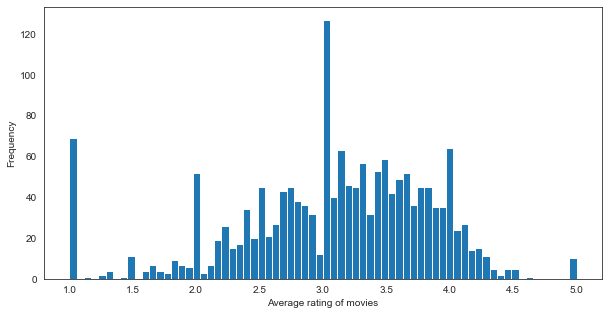

In [18]:
sns.set_style('white')
plt.figure(figsize = (10,5))
plt.hist(ratings['average rating'] , bins=70)
plt.xlabel('Average rating of movies')
plt.ylabel('Frequency')
plt.show()

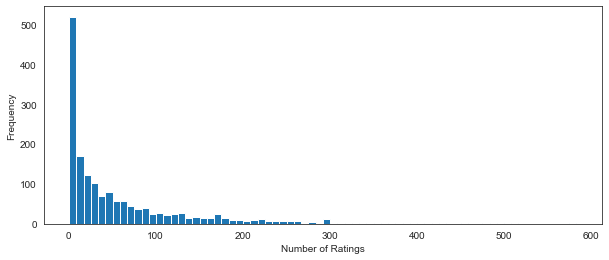

In [19]:
plt.figure(figsize = (10,4))
plt.hist(ratings['num of ratings'] , bins=70)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

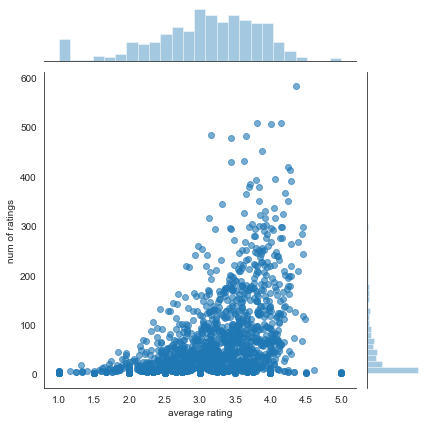

In [20]:
sns.jointplot(x = 'average rating' , y = 'num of ratings' , data = ratings , alpha=0.6);

__Recommending Similar Movies__

The next step is to pivot this table to create a matrix of the user and the movies that they have rated. This table is to provide us with an idea of which user has watched what movies and the kind of rating they have provided.

The matrix has the user ids on row axis and the movie title on another axis. Each cell consists of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies

In [21]:
movie_matrix = df.pivot_table(index = 'user_id' , columns = 'movie_title' , values = 'rating')
movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Most Rated Movie i.e movie with the highest number of ratings

In [22]:
ratings.sort_values(by = 'num of ratings' , ascending = False).head()

,average rating,num of ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [23]:
starwars_user_rating = movie_matrix['Star Wars (1977)']
starwars_user_rating

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

We’ll use the pandas corr() function to find the pairwise correlation between all the columns with respect to Star Wars

In [24]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_rating)
similar_to_starwars

movie_title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [25]:
corr_starwars = pd.DataFrame(similar_to_starwars , columns = ['Correlation'])

# dropping NaN Values
corr_starwars.dropna(inplace=True)

corr_starwars

,Correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched/rated once by users who also watched/rated star wars movie.

In [26]:
corr_starwars.sort_values(by = 'Correlation' , ascending=False).head(10)

,Correlation
movie_title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier)

In [27]:
corr_starwars = corr_starwars.join(ratings)
corr_starwars.head()

,Correlation,average rating,num of ratings
movie_title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41


In [28]:
corr_starwars['num of ratings']>100

movie_title
'Til There Was You (1997)                False
1-900 (1994)                             False
101 Dalmatians (1996)                     True
12 Angry Men (1957)                       True
187 (1997)                               False
                                         ...  
Young Guns (1988)                         True
Young Guns II (1990)                     False
Young Poisoner's Handbook, The (1995)    False
Zeus and Roxanne (1997)                  False
unknown                                  False
Name: num of ratings, Length: 1410, dtype: bool

In [29]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation' , ascending=False).head(10)

,Correlation,average rating,num of ratings
movie_title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
"Sting, The (1973)",0.367538,4.058091,241
Indiana Jones and the Last Crusade (1989),0.350107,3.930514,331
Pinocchio (1940),0.347868,3.673267,101
"Frighteners, The (1996)",0.332729,3.234783,115


__Predict Function for any Movie__

In [30]:
def predict_similar_movie(movie_name):
    
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie , columns = ['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings)
    predictions  = corr_movie[corr_movie['num of ratings']>100].sort_values(by = 'Correlation' , ascending=False)
    
    return predictions  

Recommending top 10 similar movies to Titanic (1997)

In [31]:
predicted_movies = predict_similar_movie('Titanic (1997)')
predicted_movies.head(10)

,Correlation,average rating,num of ratings
movie_title,,,
Titanic (1997),1.000000,4.245714,350
"River Wild, The (1994)",0.497600,3.143836,146
"Abyss, The (1989)",0.472103,3.589404,151
Bram Stoker's Dracula (1992),0.443560,3.158333,120
True Lies (1994),0.435104,3.562500,208
William Shakespeare's Romeo and Juliet (1996),0.430243,3.594340,106
"Last of the Mohicans, The (1992)",0.427239,3.546875,128
Outbreak (1995),0.426237,3.240385,104
Die Hard (1988),0.403124,3.872428,243
